<a href="https://colab.research.google.com/github/DeepFluxion/F1rst/blob/main/notebooks/Teste_para_vaga_Cientista_de_Dados_Senior_Parte_1_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requisitos da Parte 1 do Teste
---
### Parte 1: Algoritmos aplicados à base de dados de Fraudes do Kaggle.

Nesta Parte 1B Foi considerado o seguinte Exemplo:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Essa parte consiste na elaboração de um Jupyter Notebook (ou outra ferramenta que lhe for mais conveniente para apresentação) com pelo menos 2 técnicas à sua escolha para resolver uma ou mais competições de Fraude contidas no Kaggle. 

O candidato tem a liberdade para escolha da competição que lhe for mais conveniente, bem como de unir todas as bases de dados caso queira.
**Pacotes obrigatórios para se utilizar:** Pandas, Scikit-learn, Tensorflow (ou PyTorch).

### Comentários:
- Optou-se por uyilizar o Jupyter Notebook utilizando o Google Colab
- Nesta parte 1B o desenvolvimentou focou em técnicas de Aprendizado Profundo para classificação binária, empregando o pacote [TensorFlow 2.0](https://www.tensorflow.org/tutorials?hl=pt-br)
- Também empregou-se a API [Keras](https://www.tensorflow.org/guide/keras/sequential_model?hl=pt-br)
- Para maniputação dos dados foi usado o pacote [Pandas](https://pandas.pydata.org/)
- Outras bibliotecas mais comuns foram empregadas
- Foi usado o Python 3.7

## 1- Entendimento da base de dados

[Traduzido deste Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

### Contexto
É importante que as empresas de cartão de crédito sejam capazes de reconhecer transações fraudulentas com cartão de crédito para que os clientes não sejam cobrados por itens que não compraram.

### Conteúdo
* O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.

* Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações. 

* O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) responde por 0,172% de todas as transações.

* Tendo em vista o acentuado desbalanceamento entre os registro fraudulentos e genuínos, foi empregada a biblioteca Imbalanced-learn ('imblearn'), cujo emprego se justifica pois a fase de aprendizado e a subsequente previsão de algoritmos de aprendizado de máquina podem ser afetadas pelo problema de conjunto de dados desbalanceado.

* Para este caso optou-se por empregar o método de sobre amostragem [SMOTE: Synthetic Minority Over-sampling Technique](https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html#sphx-glr-auto-examples-over-sampling-plot-comparison-over-sampling-py) que gera novos registros com base na aplicação do algoritmo kNN. Maiores detalhes podem ser verificados em [Chawla, 2002](https://arxiv.org/pdf/1106.1813.pdf)

* O dataset contém apenas variáveis de entrada numéricas que são o resultado de uma transformação PCA. 

* Devido a questões de confidencialidade, não são fornecidos os atributos originais e mais informações básicas sobre os dados. 

* Os atributos `V1, V2, … V28` são os componentes principais obtidos com `PCA`, as únicas características que não foram transformadas com PCA são `Time` e `Amount`. 

* O atributo `Time` contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. 

* O atributo `Amount` é o valor da transação. 

* O recurso `Class` é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.

# 2 - Preparação do ambiente

Em função do fato que algumas bibliotecas e comandos sofreram alterações nas novas versões do tensorflow, preferiu-se trabalhar com a versão 2.0.0, para evitar maiores problemas, durante o desenvolvimento

In [1]:
!pip uninstall -y tensorflow #Comando necessário, pois o TensorFlow-gpu não desinstala a versão mais recente do Tensorflow, pode gerar conflitos.

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0


In [2]:
!pip install tensorflow==2.0.0 #Algumas bibliotecas ainda não tem compatibilidade com versões acima, favor utilizar somente essa versão.

     |████████████████████████████████| 86.3 MB 42 kB/s 
     |████████████████████████████████| 50 kB 9.0 MB/s 
     |████████████████████████████████| 449 kB 58.6 MB/s 
     |████████████████████████████████| 3.8 MB 62.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=608478c38673766a3cde9cc476231fbbb8053e797992070ca31d639e445ca8c2
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Success

In [3]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 41 kB/s 


#3 - Importação das bibliotecas

In [4]:
# importação das bibliotecas
import os # manipulação de diretórios e arquivos
import matplotlib.pyplot as plt # graficos
import numpy as np # algebra linear
import pandas as pd # manipulação de dados
import seaborn as sns # mais graficos
import warnings # manipulação de warnings no jupyter notebook
import gc # limpar o lixo da memoria

gc.collect() # recolhe o lixo
warnings.filterwarnings('ignore')# ignora warnings

from sklearn.preprocessing import StandardScaler # padronização dos dados
from sklearn.metrics import plot_confusion_matrix # Matriz de confusão
from sklearn.metrics import confusion_matrix # Matriz de confusão
 
from sklearn.model_selection import train_test_split # para teste
from imblearn.over_sampling import SMOTE # oversamplimg de categorias

import datetime
import tensorflow as tf

#4 - Carga dos Dados

Os dados foram processados para lotes menores de 25 MB de modo a possibilitar seu armazenamento no Gitbub.

Os dados já foram pré-processados pelos autores do dataset, portanto não há necessidade de operações deste tipo. 

In [5]:
url_data = 'https://raw.githubusercontent.com/DeepFluxion/F1rst/main/data/pre_processed_part_B/cc_part'

In [6]:
%%time

# Carregando o dataframe em partes armazenadas no github
ddf = []
for i in range(8):
    df = pd.read_csv(''.join([url_data,str(i),'.csv']))
    ddf.append(df)

CPU times: user 2.03 s, sys: 205 ms, total: 2.24 s
Wall time: 14.8 s


In [7]:
%%time

del df
gc.collect() # limpando a RAM

df = pd.concat(ddf, axis=0, ignore_index=True) # concatenando as partes do dataframe
df.drop(['Unnamed: 0'],axis=1, inplace=True)

CPU times: user 141 ms, sys: 25.9 ms, total: 166 ms
Wall time: 174 ms


In [8]:
#Vamos renomear a coluna Class para isFraud
df.rename(columns={"Class": "isFraud"}, inplace=True)

# 5 - Exploração dos dados



## 5.1 - Descrição de `Time`. `Amount` e `isFraud`

In [9]:
# Observando os dados
df[['Time','Amount','isFraud']].describe()

,Time,Amount,isFraud
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [10]:
# Verificando o numero de transações fraudulentas
df.isFraud.sum()

492

In [11]:
# verificando o montante total de transações 
df.Amount.sum()

25162590.009999998

In [12]:
# Verificando o percentual de transações fraudulentas
(df.isFraud.sum()/df.shape[0])*100

0.1727485630620034

In [13]:
# verificando missing values
df.isna().sum().sum()

0

In [ ]:
# Verificando o % do montante total de transações fraudulentas
((df.Amount*df.isFraud).sum()/df.Amount.sum())*100

0.2389577939953885

## 5.2 - Evolução temporal do número de fraudes

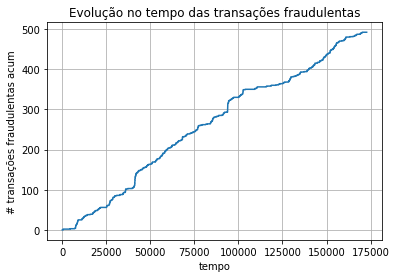

In [24]:
# Verificando a evolução no tempo das transações
plt.plot(df['Time'],df['isFraud'].cumsum())
plt.title("Evolução no tempo das transações fraudulentas")
plt.xlabel("tempo")
plt.ylabel("# transações fraudulentas acum")
plt.grid()

## 5.3 - Evolução temporal do montante das transações

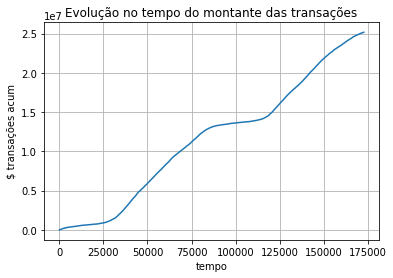

In [26]:
# Verificando a evolução no tempo do montante das transações
plt.plot(df['Time'],df['Amount'].cumsum())
plt.title("Evolução no tempo do montante das transações")
plt.xlabel("tempo")
plt.ylabel("$ transações acum")
plt.grid()

## 5.4 - Evolução temporal do montante das transações fraudulentas

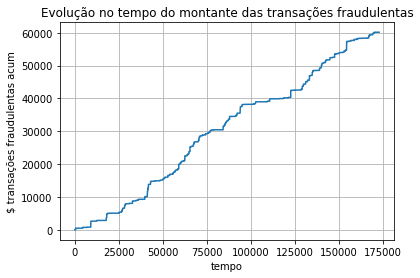

In [32]:
# Verificando a evolução no tempo do montante das transações fraudulentas
plt.plot(df['Time'],(df['Amount']*df['isFraud']).cumsum())
plt.title("Evolução no tempo do montante das transações fraudulentas")
plt.xlabel("tempo")
plt.ylabel("$ transações fraudulentas acum")
plt.grid()

## 5.5 Comparativo ente a evolução no tempo do montante das transações fraudulentas e genuínas

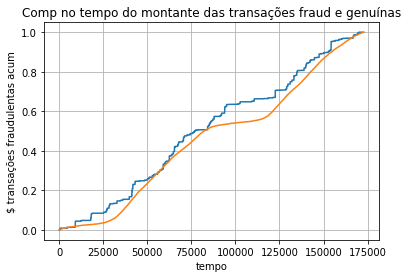

In [30]:
# Comparativo ente a evolução no tempo do montante das transações fraudulentas e genuínas
plt.plot(df['Time'],(df['Amount']*df['isFraud']).cumsum()/(df['Amount']*df['isFraud']).sum())
plt.plot(df['Time'],df['Amount'].cumsum()/df['Amount'].sum())
plt.title("Comp no tempo do montante das transações fraud e genuínas")
plt.xlabel("tempo")
plt.ylabel("$ transações fraudulentas acum")
plt.grid()

In [14]:
print(' '.join(['Total de transações fraudulentas',str(df.isFraud.sum())]))
print(' '.join(['Total do montante de transações fraudulentas',str((df.Amount*df.isFraud).sum())]))

Total de transações fraudulentas 492
Total do montante de transações fraudulentas 60127.97


## 5.6 - Matriz de Correlação

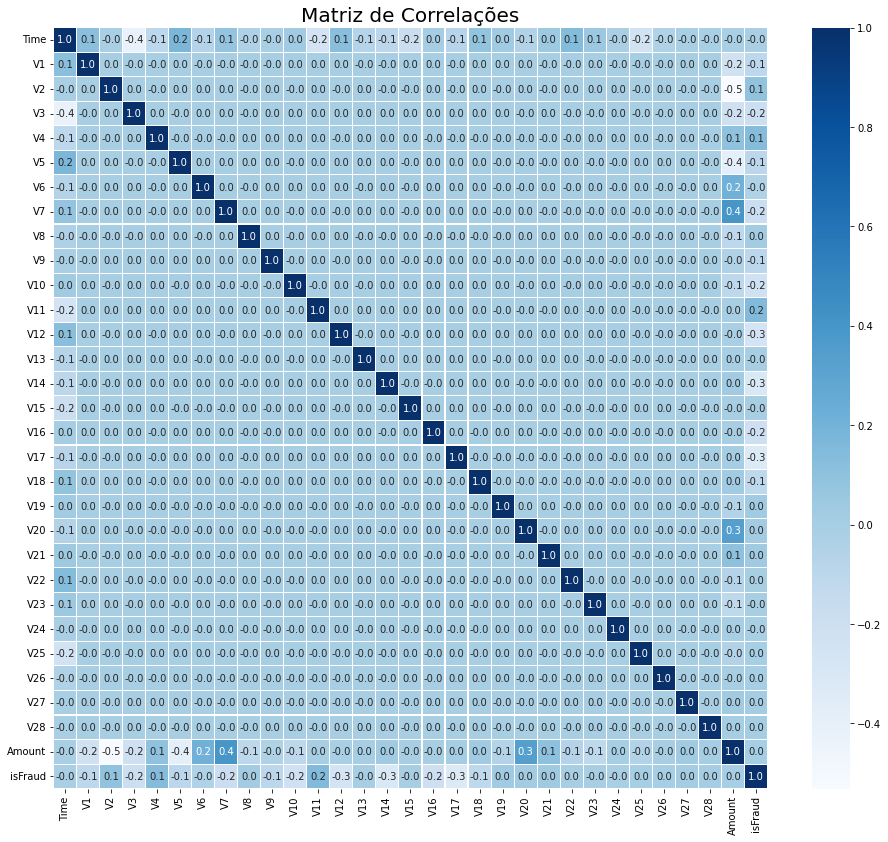

In [ ]:
#Matriz de Correlações
plt.figure(figsize = (16,14))
plt.title('Matriz de Correlações', size = 20)
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues",fmt='.1f',annot=True)
plt.show()

# 6 - Modelagem

In [15]:
# Verificando a versão do TensorFlow
tf.__version__

'2.0.0'

## 6.1 Criando a Matriz de Atributos e Vetor de Alvos y

In [16]:
# Criando a Matriz de Atributos e Vetor de Alvos y
y = df["isFraud"]
X = df.drop(["isFraud"], axis = 1)

In [17]:
# Verificando o conteudo do dataframe X
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


## 6.2 - Padronização dos Dados, Separação em blocos de treinamento e teste e aplicação do SMOTE para dados de treinamento

In [18]:
#Padronização dos Dados
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [19]:
# Separando os dados de treinamento e teste com Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 0)

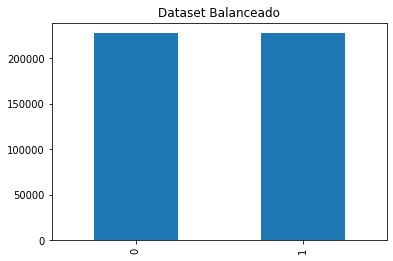

In [20]:
# SMOTE
X_train_SMOTE, y_train_SMOTE = SMOTE().fit_resample(X_train, y_train)
#SMOTE plot
pd.Series(y_train_SMOTE).value_counts().plot(kind="bar")
plt.title("Dataset Balanceado")
plt.show()  

## 6.3 - Construção do Modelo de Rede Neural com  `tensorflow.keras`

### Adição de mais camadas

Estamos definindo quatro camadas ocultas

## 6.3.1 Comentário sobre Camadas de dropout [Srivastava et al, 2014](https://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)

O artigo citado mensciona o seguinte sob o dropout:

_Redes neurais profundas com um grande número de parâmetros são sistemas de aprendizado de máquina muito poderosos(Srivastava et al, 2014)._ 

_No entanto, overfitting é um problema sério em tais redes. Redes grandes também são lentas de usar, tornando difícil lidar com overfitting combinando as previsões de muitas redes neurais grandes diferentes no momento do teste (Srivastava et al, 2014)._ 

_Dropout é uma técnica para resolver este problema. A ideia principal é descartar unidades aleatoriamente (junto com suas conexões) da rede neural durante o treinamento. Isso evita que as unidades se adaptem demais (Srivastava et al, 2014)._ 

_Durante o treinamento, amostras de dropout de um número exponencial de diferentes redes “refinadas”. No momento do teste, é fácil aproximar o efeito da média das previsões de todas essas redes reduzidas simplesmente usando uma única rede não otimizada com pesos menores. Isso reduz significativamente o overfitting e oferece grandes melhorias em relação a outros métodos de regularização (Srivastava et al, 2014)._ 

_Mostramos que o dropout melhora o desempenho de redes neurais em tarefas de aprendizado supervisionado em visão, reconhecimento de fala, classificação de documentos e biologia computacional, obtendo resultados de última geração em muitos conjuntos de dados de referência (Srivastava et al, 2014)._

In [33]:
# Rede Neural

model = tf.keras.models.Sequential() # Criando a Camada de Entrada
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape = (30,))) # Criando a Primeira camada Oculta
model.add(tf.keras.layers.Dropout(0.2)) # Criando uma camada de Droout para minimizar o overfitting
model.add(tf.keras.layers.Dense(units=32, activation='relu')) # Criando a Segunda camada Oculta
model.add(tf.keras.layers.Dropout(0.2)) # Criando uma camada de Droout para minimizar o overfitting
model.add(tf.keras.layers.Dense(units=32, activation='relu')) # Criando a Terceira camada Oculta
model.add(tf.keras.layers.Dropout(0.2)) # Criando uma camada de Droout para minimizar o overfitting
model.add(tf.keras.layers.Dense(units=32, activation='relu')) # Criando a Quarta camada Oculta
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Criando a Camada de Saída

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1

In [61]:
# Metricas
metrics = [
           tf.keras.metrics.Accuracy(name="Acuracia"),
           tf.keras.metrics.Precision(name="Precisao"),
           tf.keras.metrics.Recall(name="Recall"),
           tf.keras.metrics.AUC(name='AUC'),
           #tf.keras.metrics.TruePositives(name='VP'),
           #tf.keras.metrics.TrueNegatives(name='VN'),
           #tf.keras.metrics.FalsePositives(name='FP'),
           #tf.keras.metrics.FalseNegatives(name='FN')
           ]

In [48]:
scores = []

In [49]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [62]:
# Compilando e ajustando o modelo
with tf.device('/device:GPU:0'):
  model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = metrics)
  model_SMOTE_history = (model.fit(X_train_SMOTE, y_train_SMOTE.values, batch_size = 32, epochs = 100))
  print("Evaluate on test data")
  score = model.evaluate(X_test, y_test.values)

Train on 454908 samples
Epoch 1/100
454908/454908 [==============================] - 58s 127us/sample - loss: 0.0062 - Acuracia: 0.8830 - Precisao: 0.9994 - Recall: 0.9997 - AUC: 0.9998
Epoch 2/100
454908/454908 [==============================] - 57s 125us/sample - loss: 0.0049 - Acuracia: 0.8210 - Precisao: 0.9994 - Recall: 0.9998 - AUC: 0.9998
Epoch 3/100
454908/454908 [==============================] - 57s 126us/sample - loss: 0.0033 - Acuracia: 0.8239 - Precisao: 0.9995 - Recall: 0.9999 - AUC: 0.9999
Epoch 4/100
454908/454908 [==============================] - 58s 128us/sample - loss: 0.0032 - Acuracia: 0.8186 - Precisao: 0.9996 - Recall: 0.9999 - AUC: 0.9999
Epoch 5/100
454908/454908 [==============================] - 58s 127us/sample - loss: 0.0053 - Acuracia: 0.8021 - Precisao: 0.9996 - Recall: 0.9999 - AUC: 0.9998
Epoch 6/100
454908/454908 [==============================] - 58s 127us/sample - loss: 0.0021 - Acuracia: 0.7868 - Precisao: 0.9995 - Recall: 0.9999 - AUC: 0.9998
Epoc

In [63]:
scores.append(score)
print(score)

[0.05013905677800778, 0.997314, 0.8269231, 0.85148513, 0.9305426]


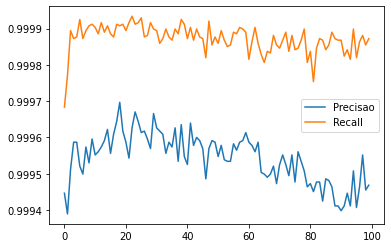

In [64]:
pd.DataFrame(model_SMOTE_history.history)[['Precisao','Recall']].plot()

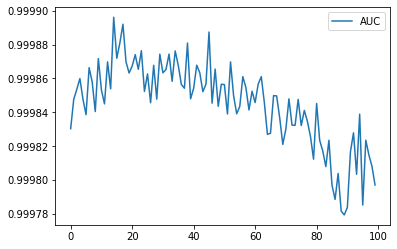

In [65]:
pd.DataFrame(model_SMOTE_history.history)[['AUC']].plot()

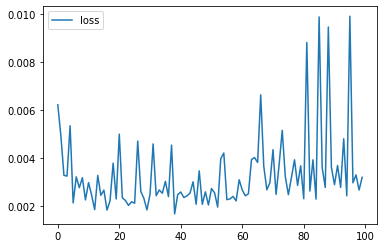

In [66]:
pd.DataFrame(model_SMOTE_history.history)[['loss']].plot()

In [67]:
pd.DataFrame(model_SMOTE_history.history).to_excel('/content/model_SMOTE_history.xlsx')

In [68]:
# Compilando e ajustando o modelo
with tf.device('/device:GPU:0'):

  model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = metrics)
  model_history = (model.fit(X_train, y_train.values, batch_size = 32, epochs = 100))

Train on 227845 samples
Epoch 1/100
227845/227845 [==============================] - 31s 134us/sample - loss: 0.0020 - Acuracia: 0.9981 - Precisao: 0.8618 - Recall: 0.9565 - AUC: 0.9910
Epoch 2/100
227845/227845 [==============================] - 29s 129us/sample - loss: 0.0012 - Acuracia: 0.9981 - Precisao: 0.8852 - Recall: 0.9463 - AUC: 0.9936
Epoch 3/100
227845/227845 [==============================] - 29s 128us/sample - loss: 0.0013 - Acuracia: 0.9972 - Precisao: 0.8791 - Recall: 0.9668 - AUC: 0.9936
Epoch 4/100
227845/227845 [==============================] - 29s 129us/sample - loss: 0.0013 - Acuracia: 0.9977 - Precisao: 0.8661 - Recall: 0.9591 - AUC: 0.9935
Epoch 5/100
227845/227845 [==============================] - 29s 127us/sample - loss: 0.0013 - Acuracia: 0.9972 - Precisao: 0.8654 - Recall: 0.9540 - AUC: 0.9936
Epoch 6/100
227845/227845 [==============================] - 29s 129us/sample - loss: 9.7115e-04 - Acuracia: 0.9967 - Precisao: 0.8709 - Recall: 0.9488 - AUC: 0.9974


In [69]:
scores.append(score)
print(score)

[0.05013905677800778, 0.997314, 0.8269231, 0.85148513, 0.9305426]


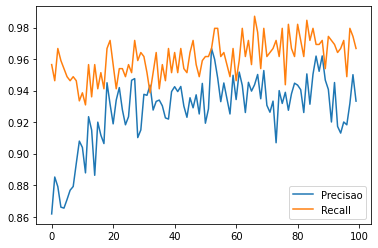

In [70]:
pd.DataFrame(model_history.history)[['Precisao','Recall']].plot()

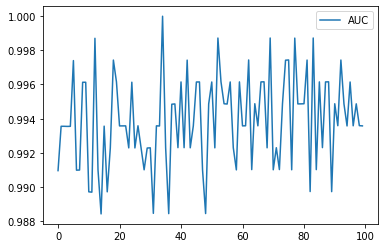

In [71]:
pd.DataFrame(model_history.history)[['AUC']].plot()

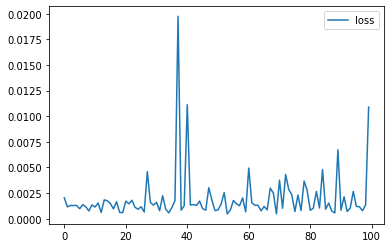

In [72]:
pd.DataFrame(model_history.history)[['loss']].plot()

In [79]:
score = model.evaluate(X_test, y_test.values)

56962/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [84]:
scores = scores[-1]

In [85]:
scores.append(score)
print(score)

[0.14479122531008004, 0.9982971, 0.9222222, 0.8217822, 0.9207298]


In [87]:
correc = scores

In [88]:
correc=scores[0:5]

In [89]:
correc

[0.05013905677800778, 0.997314, 0.8269231, 0.85148513, 0.9305426]

In [90]:
scores[-1]

[0.14479122531008004, 0.9982971, 0.9222222, 0.8217822, 0.9207298]

In [97]:
pd.DataFrame([correc,scores[-1]], columns =['loss','Acuracia','Precisao','Recall','AUC']).to_excel('/content/sc.xlsx')